# Circuiti 3

In [1]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

In [2]:
R_gen = ufloat(51.7,0.6)

### Circuito RC

In [3]:
R = 266.6 #ohm
R_tot = R + R_gen 
C = 10 * 10 ** (-9) #farad

freq = 1 / (R_tot*C*2*np.pi)
print(freq)

(5.000+/-0.009)e+04


In [4]:
data = np.loadtxt("Dati/RC_v2.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento VB / VA

Modulo

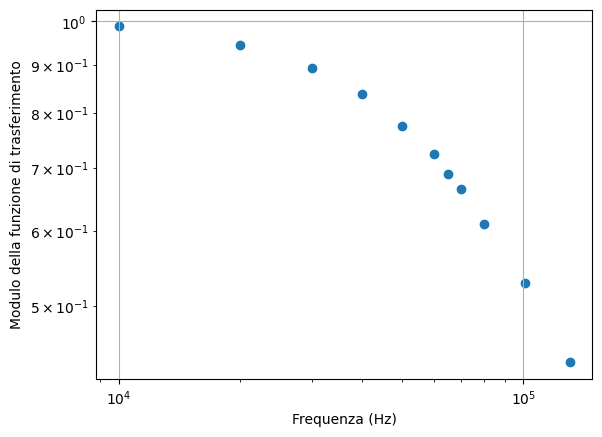

In [5]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

Fase

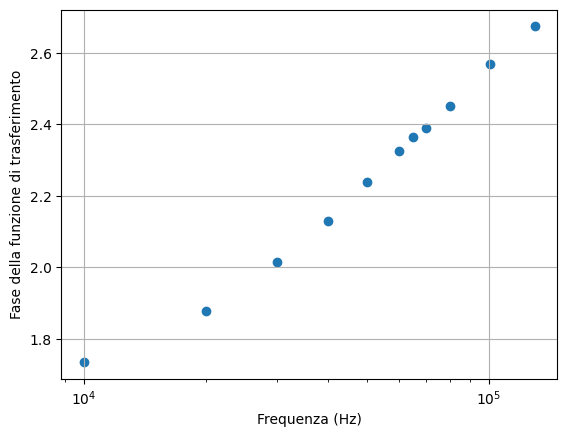

In [6]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [7]:
def model(x,a):
    return a / x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.931 (χ²/ndof = 0.4)      │              Nfcn = 18               │
│ EDM = 1.89e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -64.0e3  │   0.8e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 5.96e+05 │
└───┴──────────┘

p value: 0.9503865521256307
10.0


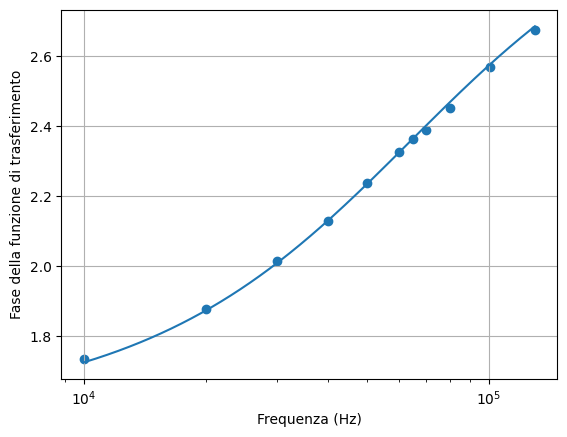

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Tensione ai capi della resistenza

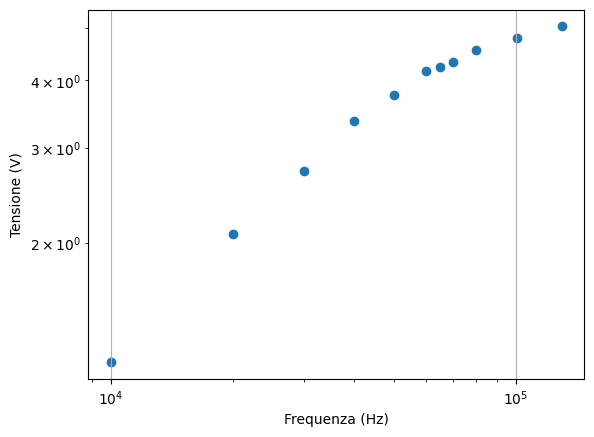

In [9]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Tensione (V)")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vin_out)

plt.grid()
plt.show()

In [10]:
def model(x,a,b):
    return 1 / np.sqrt(a + b/(x**2))

V_err = 0.04 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_17320\3462231676.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.048 (χ²/ndof = 0.7)      │              Nfcn = 168              │
│ EDM = 1.27e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0371   │  0.0019   │            │            │         │         │       │
│ 1 │ b    │   76e6    │    4e6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │               a               b │
├───┼─────────────────────────────────┤
│ a │        3.49e-06 -4.9698541946e3 │
│ b │ -4.9698541946e3        1.97e+13 │
└───┴─────────────────────────────────┘

p value: 0.7350746197556823
9.0


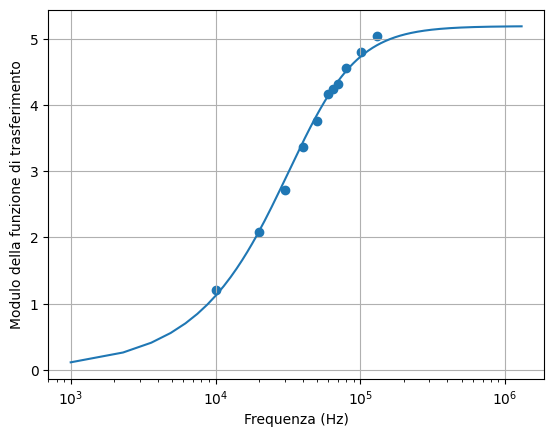

In [11]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(min(freq)/10,max(freq)*10,1000)
y = model(x,m.values["a"],m.values["b"])
plt.plot(x,y)

plt.grid()
plt.show()

### Circuito RL

In [12]:
R = 266.6 #ohm
R_tot = R + 50 
L = 35 * 10 ** (-3) #farad

freq = R_tot / (L*2*np.pi)
print(freq)

1439.6701423684017


In [13]:
data = np.loadtxt("Dati/RL.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento VB / VA

Modulo

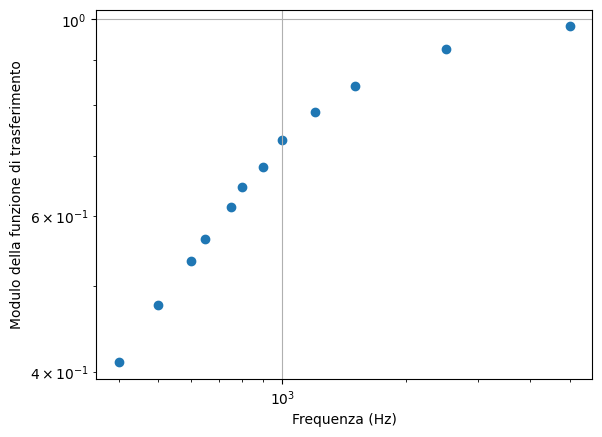

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

Fase

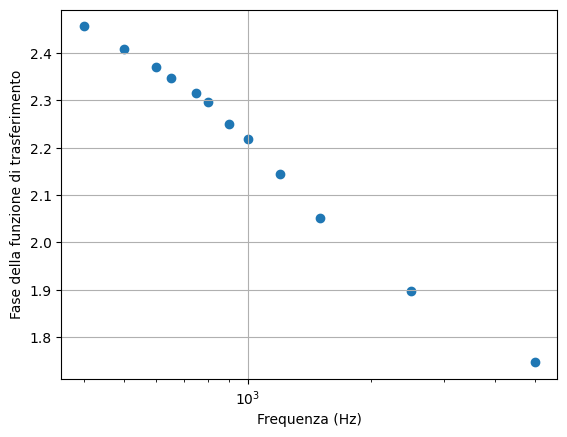

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [16]:
def model(x,a):
    return a * x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 183.7 (χ²/ndof = 16.7)     │              Nfcn = 20               │
│ EDM = 1.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ -1.382e-3 │ 0.016e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 2.61e-10 │
└───┴──────────┘

p value: 0.0
11.0


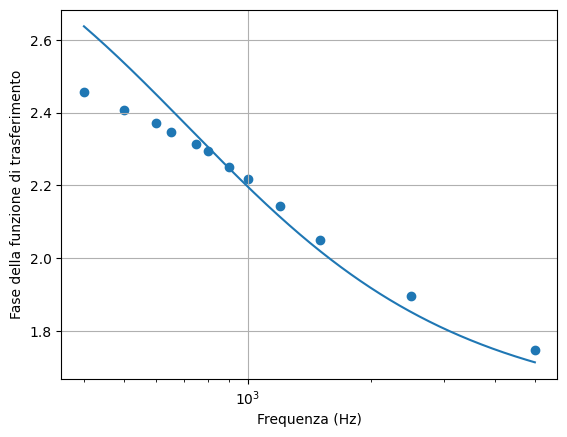

In [17]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Tensione ai capi della resistenza

In [18]:
def model(x,a,b):
    return 1 / np.sqrt(a + b*(x**2))

V_err = 0.02 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 0.005, b = 0.00000001)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.71 (χ²/ndof = 0.8)       │              Nfcn = 113              │
│ EDM = 3.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  43.5e-3  │  1.0e-3   │            │            │         │         │       │
│ 1 │ b    │  28.2e-9  │  0.9e-9   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │             a             b │
├───┼─────────────────────────────┤
│ a │      9.03e-07 -479.9464e-15 │
│ b │ -479.9464e-15      7.42e-19 │
└───┴─────────────────────────────┘

p value: 0.6571231028505302
10.0


### Circuito RLC

### Funzione di trasferimento della resistenza

In [19]:
L = 14 * 10 ** (-3)
C = 10 * 10 ** (-9)
R = 266.6 #ohm
R_tot = R + 50 
V0 = 6.5

omega0 = 1/np.sqrt(L*C)
print(omega0/(2*np.pi))

13451.047731519027


In [20]:
data = np.loadtxt("Dati/RLC_R.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

freq_R = np.array(freq)
Vin_R = np.array(Vin)
Vout_R = np.array(Vout)
phdiff_R = np.array(phdiff)

Modulo

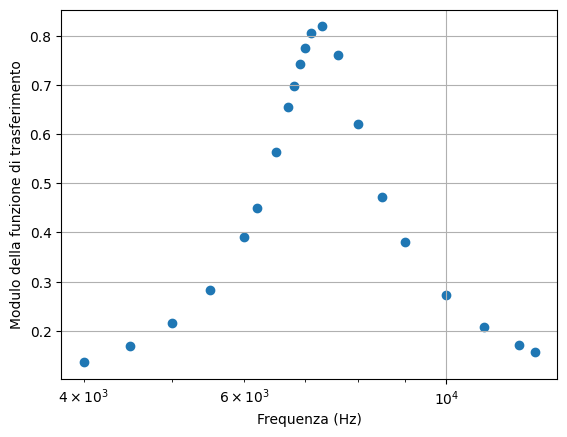

In [21]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [22]:
a0 = 1/(V0**2) - (2*L/C) / ((R * V0)**2)
b0 = L**2 / ((R*V0)**2)
c0 = 1 / ((C*R*V0)**2)
print(a0,b0,c0)

-0.9087501747993895 6.526931696968508e-11 3330067192.33087


In [23]:
def model(x,a,b,c):
    return 1 / np.sqrt(a + b*x**2 + c/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0, c = c0)
m.strategy = 2
m.limits["a"] = (None, 0)
m.limits["b", "c"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_17320\192734475.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b*x**2 + c/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.97 (χ²/ndof = 0.7)      │              Nfcn = 446              │
│ EDM = 2.32e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -62.1   │    1.0    │            │            │         │    0    │       │
│ 1 │ b    │  596e-9   │   9e-9    │            │            │    0    │         │       │
│ 2 │ c    │  1.696e9  │  0.026e9  │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────────────────┐
│   │                     a                     b                     c │
├───┼───────────────────────────────────────────────────────────────────┤
│ a │                 0.926        -8.69671436e-9         -24.1472764e6 │
│ b │        -8.69671436e-9              8.44e-17 219.55951722415014e-3 │
│ c │         -24.1472764e6 219.55951722415014e-3              6.49e+14 │
└───┴───────────────────────────────────────────────────────────────────┘

p value: 0.8487189389477987
18.0


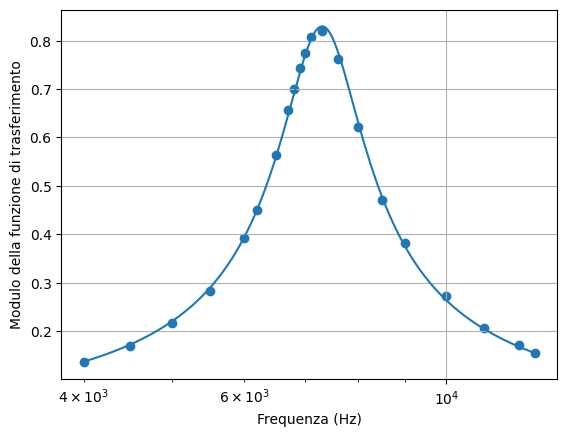

In [24]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.show()

In [25]:
R_tot = ufloat(R_tot, 0.02*R_tot)
b = ufloat(m.values["b"], m.errors["b"])
c = ufloat(m.values["c"], m.errors["c"])


L_mod = uu.sqrt(b * R_tot**2) / (2*np.pi)
C_mod = 1 / (2*np.pi*R_tot*uu.sqrt(c))

print("L: " + str(L_mod))
print("C: " + str(C_mod))

L: 0.0389+/-0.0008
C: (1.221+/-0.026)e-08


Fase

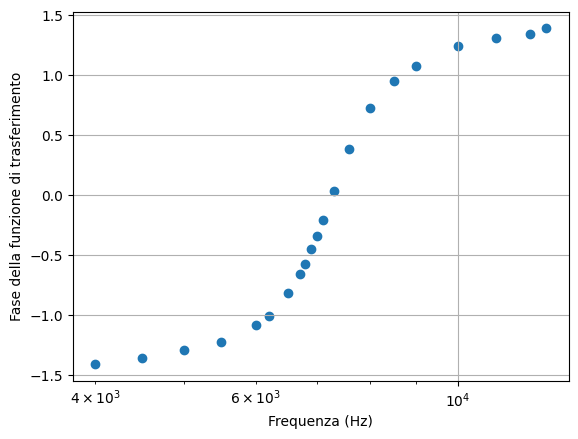

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, phdiff)
plt.grid()
plt.show()

In [27]:
def model(x,a,b):
    return a*x + b/x

err = 0.05 * np.tan(phdiff)

minimi_quadrati = LeastSquares(freq, np.tan(phdiff), err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 20.53 (χ²/ndof = 1.1)      │              Nfcn = 82               │
│ EDM = 1.49e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  635e-6   │   7e-6    │            │            │         │         │       │
│ 1 │ b    │  -33.6e3  │   0.4e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │              a              b │
├───┼───────────────────────────────┤
│ a │       4.89e-11 -2.59496187e-3 │
│ b │ -2.59496187e-3       1.38e+05 │
└───┴───────────────────────────────┘

p value: 0.36342863890063937
19.0


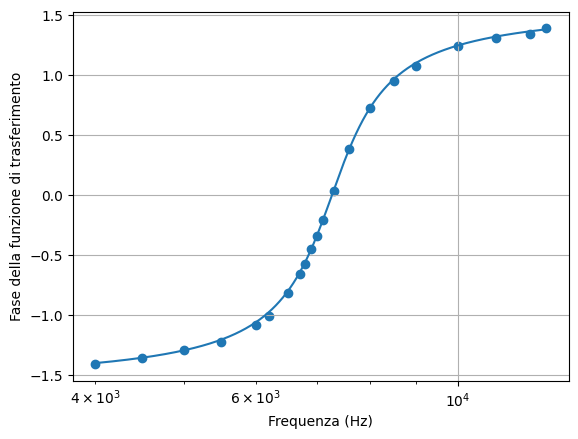

In [28]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.arctan(model(x,m.values["a"],m.values["b"]))
plt.plot(x,y)

plt.grid()
plt.show()

In [29]:
a = ufloat(m.values["a"], m.errors["a"])
b = ufloat(m.values["b"], m.errors["b"])


L_fase = a * R_tot / (2*np.pi)
C_fase = -1 / (2*np.pi*b*R_tot)

print("L: " + str(L_fase))
print("C: " + str(C_fase))

L: 0.0320+/-0.0007
C: (1.497+/-0.034)e-08


Studio di L e C

In [30]:
t_L = abs(L_mod.nominal_value - L_fase.nominal_value) / np.sqrt(L_mod.std_dev**2 + L_fase.std_dev**2)
t_C = abs(C_mod.nominal_value - C_fase.nominal_value) / np.sqrt(C_mod.std_dev**2 + C_fase.std_dev**2)

print(t_L, t_C)

6.207806163114558 6.415868426058619


#### Funzione di trasferimento dell'induttore v1

In [31]:
R = ufloat(300, 3) #ohm
R_tot = R + R_gen
C = 10 * 10 ** (-9) #farad
L = 10**(-3) #henry, non lo sappiamo ordine di grandezza
V0 = 6 #volt

In [32]:
data = np.loadtxt("Dati/RLC_Lv1.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0]
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(np.pi/2 - phdiff)

freq_L = np.array(freq)
Vin_L = np.array(Vin)
Vout_L = np.array(Vout)
phdiff_L = np.array(np.pi/2 - phdiff)

Modulo

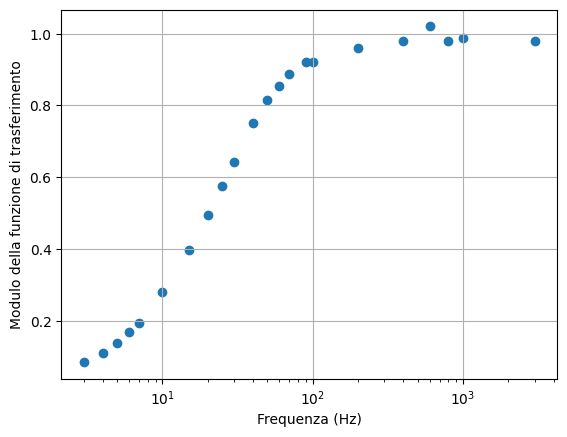

In [33]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [34]:
a0 = R.nominal_value**2/(L**2) - 2/(C*L)
b0 = 1
c0 = 1/(C*L)**2
print(a0,b0,c0)

-109999999999.99997 1 9.999999999999998e+21


In [35]:
def model(x,a,b):
    return x / np.sqrt(a + 4*np.pi**2*x**2 + b/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = c0)
m.strategy = 2
m.limits["b"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.5e+04 (χ²/ndof = 2750.0) │              Nfcn = 38               │
│ EDM = 4.34e-32 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │-110.000000000e9│0.000000002e9│            │            │         │         │       │
│ 1 │ b    │   1e22    │   0e22    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │  a  b │
├───┼───────┤
│ a │  4 -0 │
│ b │ -0  4 │
└───┴───────┘

p value: 0.0
20.0


Fase

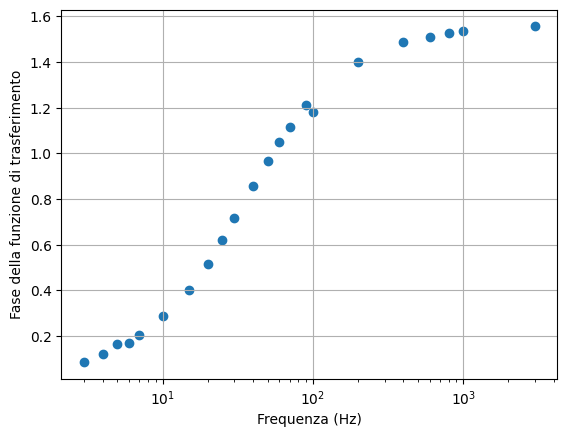

In [36]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, phdiff)
plt.grid()
plt.show()

In [37]:
def model(x,a,b):
    return a*x + b/x

err = 0.05 * np.tan(phdiff)

minimi_quadrati = LeastSquares(freq, np.tan(phdiff), err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 53.62 (χ²/ndof = 2.7)      │              Nfcn = 48               │
│ EDM = 3.51e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 27.83e-3  │  0.33e-3  │            │            │         │         │       │
│ 1 │ b    │   0.026   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.09e-07 -1.57e-6 │
│ b │ -1.57e-6 0.000135 │
└───┴───────────────────┘

p value: 6.582867784232782e-05
20.0


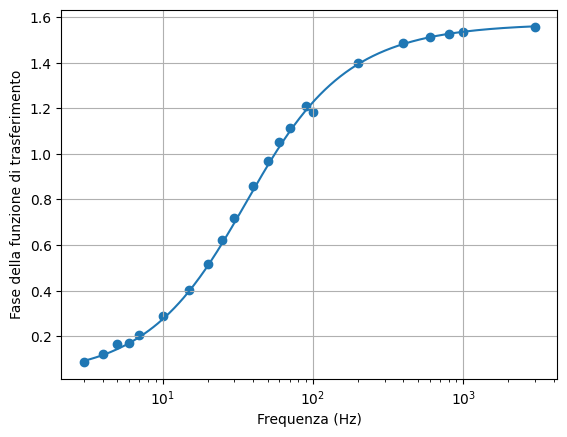

In [38]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.arctan(model(x,m.values["a"],m.values["b"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Funzione di trasferimento del condensatore

In [39]:
R = ufloat(300,3) #ohm
R_tot = R + R_gen
C = 10 * 10 ** (-9) #farad
L = 10**(-3) #henry, non lo sappiamo ordine di grandezza
V0 = 6 #volt

In [40]:
data = np.loadtxt("Dati/RLC_C.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff + np.pi/2)

freq_C = np.array(freq)
Vin_C = np.array(Vin)
Vout_C = np.array(Vout)
phdiff_C = np.array(phdiff + np.pi/2)

Modulo

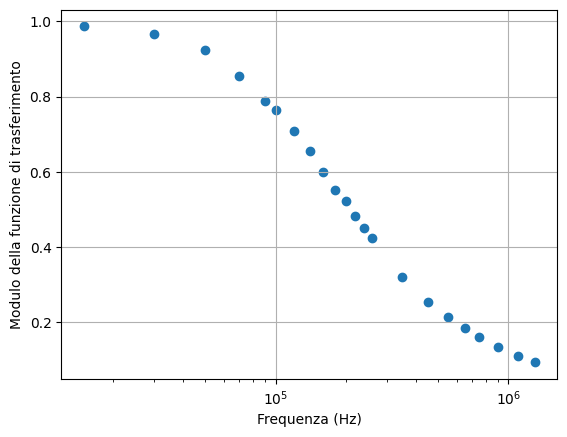

In [41]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [42]:
C = 4*10**(-9)
L = 10**(-5)

In [43]:
a0 = (R.nominal_value*C)**2 - 2*L*C
b0 = (2*np.pi*L*C)**2
print(a0,b0)

1.3600000000000003e-12 6.31654681669719e-26


In [44]:
def model(x,a,b):
    return 1 / (x * np.sqrt(a + b*x**2 + 1/(4*np.pi**2*x**2)))

V_err = 0.05 * Vout

minimi_quadrati = LeastSquares(freq, Vout, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_17320\1372538453.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (x * np.sqrt(a + b*x**2 + 1/(4*np.pi**2*x**2)))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 652 (χ²/ndof = 32.6)       │              Nfcn = 488              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 1.36e-12  │    nan    │            │            │         │         │       │
│ 1 │ b    │6.3165e-26 │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │   a   b │
├───┼─────────┤
│ a │ nan nan │
│ b │ nan nan │
└───┴─────────┘

p value: 0.0
20.0


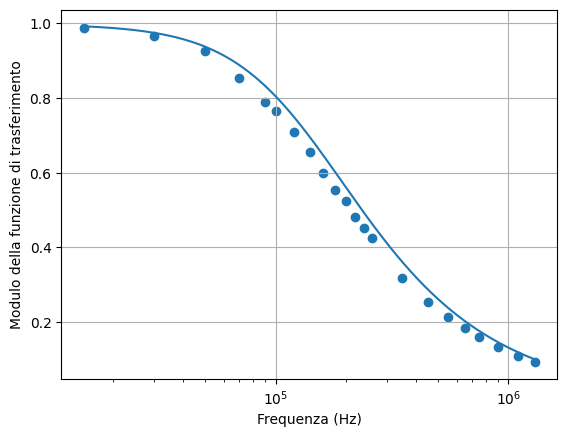

In [45]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,a0,b0)/6.3
plt.plot(x,y)

plt.grid()
plt.show()

Fase

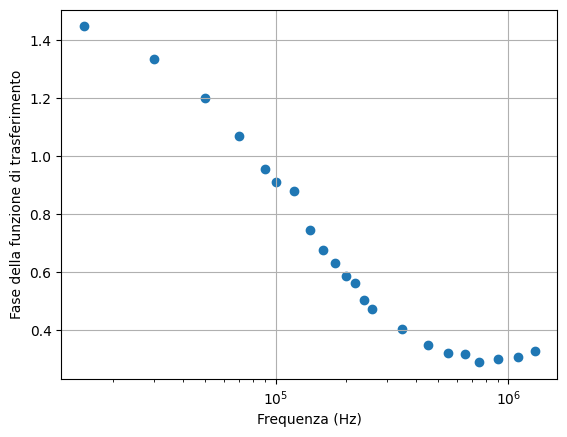

In [46]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, phdiff)
plt.grid()
plt.show()

In [47]:
def model(x,a,b):
    return a*x + b/x

err = 0.05 * np.tan(phdiff)

minimi_quadrati = LeastSquares(freq, np.tan(phdiff), err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.315 (χ²/ndof = 0.4)      │              Nfcn = 117              │
│ EDM = 2.12e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  185e-9   │   8e-9    │            │            │         │         │       │
│ 1 │ b    │  126.1e3  │   1.7e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │                 a                 b │
├───┼─────────────────────────────────────┤
│ a │          5.79e-17 -5.23693491799e-6 │
│ b │ -5.23693491799e-6          2.96e+06 │
└───┴─────────────────────────────────────┘

p value: 0.9895661407216134
20.0


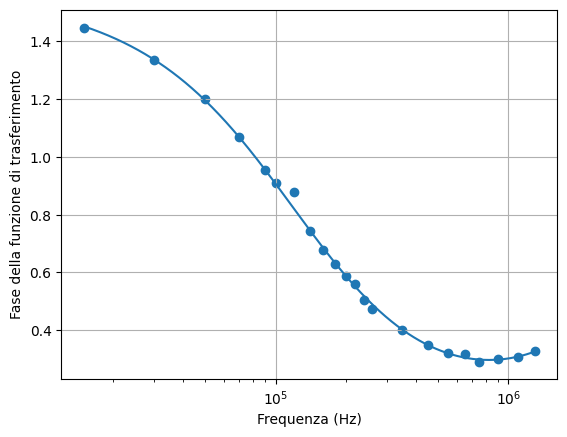

In [48]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.arctan(model(x,m.values["a"],m.values["b"]))
plt.plot(x,y)

plt.grid()
plt.show()

In [49]:
a = ufloat(m.values["a"], m.errors["a"])
b = ufloat(m.values["b"], m.errors["b"])


L_fase = a * R_tot / (2*np.pi)
C_fase = -1 / (2*np.pi*b*R_tot)

print("L: " + str(L_fase))
print("C: " + str(C_fase))

L: (1.03+/-0.04)e-05
C: (-3.59+/-0.06)e-09
